# **Python implementation of the bisection algorithm**

Approximate root: 1.5213804245
Function value at root: 0.0000042658
Number of iterations: 20


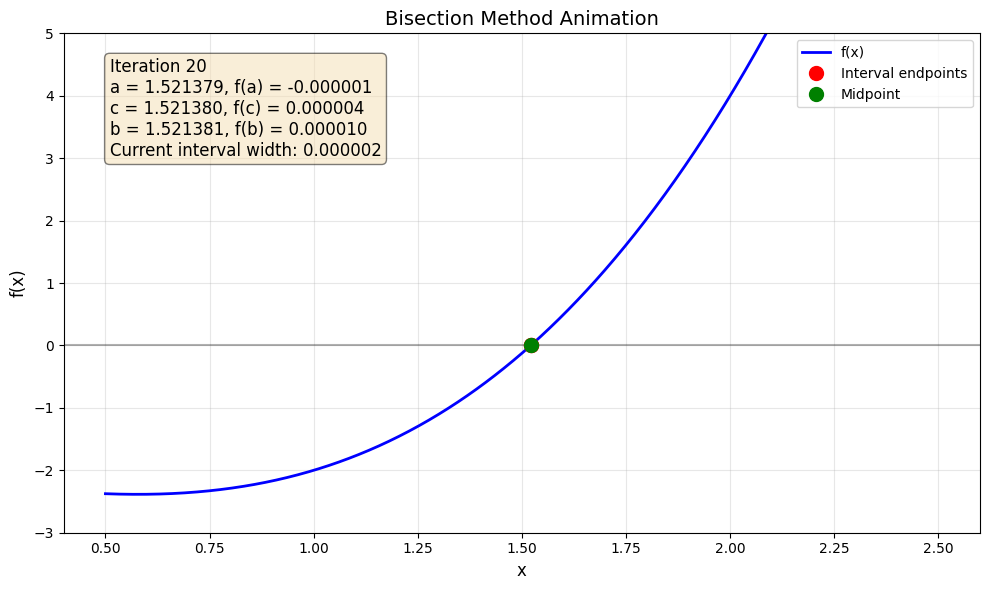

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def bisection(f, a, b, tol=1e-6, max_iter=100):
    """
    Find root of f(x) = 0 using bisection method.

    Parameters:
    -----------
    f : function
        The function for which we want to find the root
    a, b : float
        The interval [a, b] where f(a) and f(b) have opposite signs
    tol : float, optional
        Tolerance for stopping criterion |b - a| < tol
    max_iter : int, optional
        Maximum number of iterations

    Returns:
    --------
    x : float
        Approximate root of f(x) = 0
    iterations : list
        List of tuples (a, c, b, f(c)) for each iteration
    """
    # Check if f(a) and f(b) have opposite signs
    if f(a) * f(b) >= 0:
        raise ValueError("Function values at interval endpoints must have opposite signs")

    iterations = []

    for i in range(max_iter):
        # Compute midpoint
        c = (a + b) / 2

        # Compute function value at midpoint
        fc = f(c)

        # Store current iteration information
        iterations.append((a, c, b, fc))

        # Check if we've found the root or reached tolerance
        if abs(fc) < tol or (b - a) / 2 < tol:
            break

        # Update interval
        if f(a) * fc < 0:
            b = c
        else:
            a = c

    return c, iterations

def visualize_bisection(f, a, b, iterations, f_range=None, save_gif=False, filename='bisection.gif'):
    """
    Create an animation of the bisection method.

    Parameters:
    -----------
    f : function
        The function for which we found the root
    a, b : float
        The original interval [a, b]
    iterations : list
        List of tuples (a, c, b, f(c)) for each iteration
    f_range : tuple, optional
        Range of function values to display on y-axis
    save_gif : bool, optional
        Whether to save the animation as a GIF
    filename : str, optional
        Filename for the saved GIF
    """
    # Create a range of x values for plotting
    margin = (b - a) * 0.5
    x = np.linspace(a - margin, b + margin, 1000)
    y = [f(val) for val in x]

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the function
    ax.plot(x, y, 'b-', lw=2, label='f(x)')

    # Plot x-axis
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)

    # Set y-axis limits if provided
    if f_range:
        ax.set_ylim(f_range)

    # Set labels and title
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.set_title('Bisection Method Animation', fontsize=14)
    ax.grid(True, alpha=0.3)

    # Initialize plots for current interval and midpoint
    interval_plot, = ax.plot([], [], 'ro', ms=10, label='Interval endpoints')
    midpoint_plot, = ax.plot([], [], 'go', ms=10, label='Midpoint')
    text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax.legend(loc='best')

    def init():
        interval_plot.set_data([], [])
        midpoint_plot.set_data([], [])
        text.set_text('')
        return interval_plot, midpoint_plot, text

    def animate(i):
        a_i, c_i, b_i, fc_i = iterations[i]

        # Update interval endpoints
        interval_plot.set_data([a_i, b_i], [f(a_i), f(b_i)])

        # Update midpoint
        midpoint_plot.set_data([c_i], [fc_i])

        # Update text information
        text.set_text(f'Iteration {i+1}\n'
                      f'a = {a_i:.6f}, f(a) = {f(a_i):.6f}\n'
                      f'c = {c_i:.6f}, f(c) = {fc_i:.6f}\n'
                      f'b = {b_i:.6f}, f(b) = {f(b_i):.6f}\n'
                      f'Current interval width: {b_i - a_i:.6f}')

        return interval_plot, midpoint_plot, text

    # Create animation
    ani = FuncAnimation(fig, animate, frames=len(iterations), init_func=init,
                        blit=True, repeat=True, interval=1000)

    # Save as GIF if requested
    if save_gif:
        ani.save(filename, writer='pillow', fps=1)

    plt.tight_layout()
    plt.show()

    return ani

# Test the bisection method on a toy example
if __name__ == "__main__":
    # Define a simple function with a known root
    def f(x):
        return x**3 - x - 2  # Root at approximately x ≈ 1.521

    # Initial interval
    a, b = 1, 2

    # Run bisection method
    root, iterations = bisection(f, a, b, tol=1e-6)

    print(f"Approximate root: {root:.10f}")
    print(f"Function value at root: {f(root):.10f}")
    print(f"Number of iterations: {len(iterations)}")

    # Create animation
    ani = visualize_bisection(f, a, b, iterations, f_range=(-3, 5), save_gif=True)

Running bisection algorithm...
Approximate root: 1.5213804245
Function value at root: 0.0000042658
Number of iterations: 20
Creating visualization...


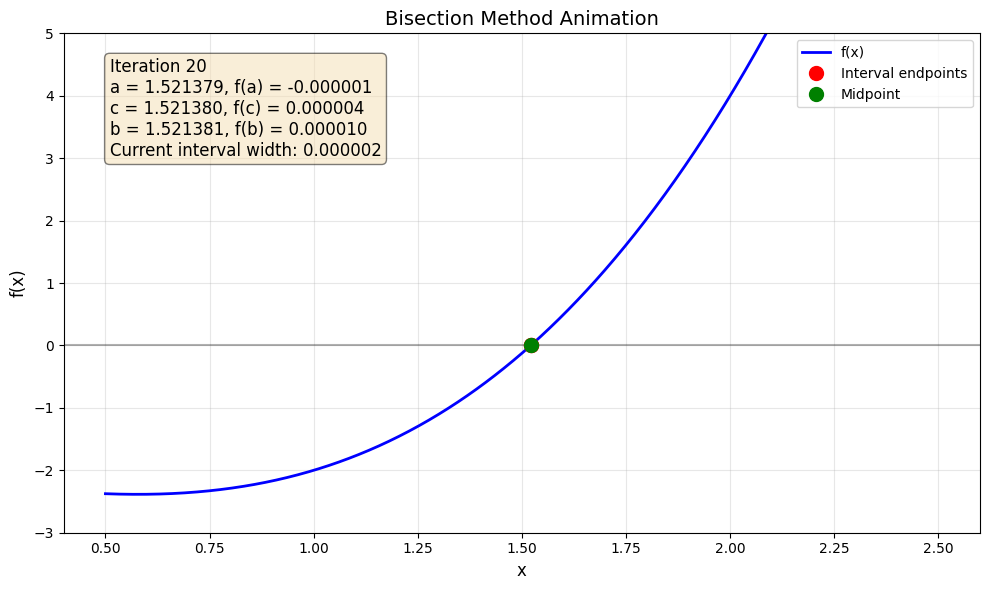

Visualization complete. Check 'bisection_animation.gif' for the saved animation.

Iteration details:
Iteration 1:
  a = 1.000000, f(a) = -2.000000
  c = 1.500000, f(c) = -0.125000
  b = 2.000000, f(b) = 4.000000
  Current interval width: 1.000000
Iteration 2:
  a = 1.500000, f(a) = -0.125000
  c = 1.750000, f(c) = 1.609375
  b = 2.000000, f(b) = 4.000000
  Current interval width: 0.500000
Iteration 3:
  a = 1.500000, f(a) = -0.125000
  c = 1.625000, f(c) = 0.666016
  b = 1.750000, f(b) = 1.609375
  Current interval width: 0.250000
Iteration 4:
  a = 1.500000, f(a) = -0.125000
  c = 1.562500, f(c) = 0.252197
  b = 1.625000, f(b) = 0.666016
  Current interval width: 0.125000
Iteration 5:
  a = 1.500000, f(a) = -0.125000
  c = 1.531250, f(c) = 0.059113
  b = 1.562500, f(b) = 0.252197
  Current interval width: 0.062500


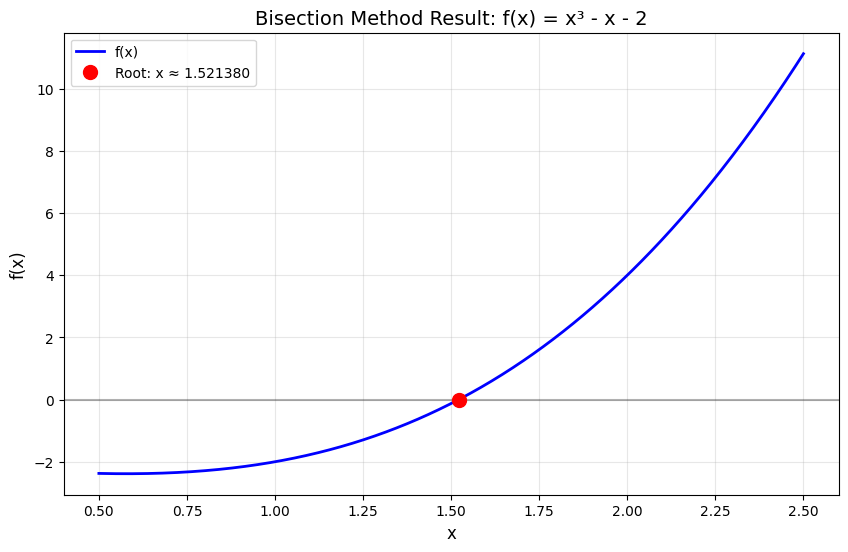

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def bisection(f, a, b, tol=1e-6, max_iter=100):
    """
    Find root of f(x) = 0 using bisection method.

    Parameters:
    -----------
    f : function
        The function for which we want to find the root
    a, b : float
        The interval [a, b] where f(a) and f(b) have opposite signs
    tol : float, optional
        Tolerance for stopping criterion |b - a| < tol
    max_iter : int, optional
        Maximum number of iterations

    Returns:
    --------
    x : float
        Approximate root of f(x) = 0
    iterations : list
        List of tuples (a, c, b, f(c)) for each iteration
    """
    # Check if f(a) and f(b) have opposite signs
    if f(a) * f(b) >= 0:
        raise ValueError("Function values at interval endpoints must have opposite signs")

    iterations = []

    for i in range(max_iter):
        # Compute midpoint
        c = (a + b) / 2

        # Compute function value at midpoint
        fc = f(c)

        # Store current iteration information
        iterations.append((a, c, b, fc))

        # Check if we've found the root or reached tolerance
        if abs(fc) < tol or (b - a) / 2 < tol:
            break

        # Update interval
        if f(a) * fc < 0:
            b = c
        else:
            a = c

    return c, iterations

def visualize_bisection(f, a, b, iterations, f_range=None, save_gif=False, filename='bisection.gif'):
    """
    Create an animation of the bisection method.

    Parameters:
    -----------
    f : function
        The function for which we found the root
    a, b : float
        The original interval [a, b]
    iterations : list
        List of tuples (a, c, b, f(c)) for each iteration
    f_range : tuple, optional
        Range of function values to display on y-axis
    save_gif : bool, optional
        Whether to save the animation as a GIF
    filename : str, optional
        Filename for the saved GIF
    """
    # Create a range of x values for plotting
    margin = (b - a) * 0.5
    x = np.linspace(a - margin, b + margin, 1000)
    y = [f(val) for val in x]

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the function
    ax.plot(x, y, 'b-', lw=2, label='f(x)')

    # Plot x-axis
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)

    # Set y-axis limits if provided
    if f_range:
        ax.set_ylim(f_range)

    # Set labels and title
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.set_title('Bisection Method Animation', fontsize=14)
    ax.grid(True, alpha=0.3)

    # Initialize plots for current interval and midpoint
    interval_plot, = ax.plot([], [], 'ro', ms=10, label='Interval endpoints')
    midpoint_plot, = ax.plot([], [], 'go', ms=10, label='Midpoint')
    text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax.legend(loc='best')

    def init():
        interval_plot.set_data([], [])
        midpoint_plot.set_data([], [])
        text.set_text('')
        return interval_plot, midpoint_plot, text

    def animate(i):
        a_i, c_i, b_i, fc_i = iterations[i]

        # Update interval endpoints
        interval_plot.set_data([a_i, b_i], [f(a_i), f(b_i)])

        # Update midpoint
        midpoint_plot.set_data([c_i], [fc_i])

        # Update text information
        text.set_text(f'Iteration {i+1}\n'
                      f'a = {a_i:.6f}, f(a) = {f(a_i):.6f}\n'
                      f'c = {c_i:.6f}, f(c) = {fc_i:.6f}\n'
                      f'b = {b_i:.6f}, f(b) = {f(b_i):.6f}\n'
                      f'Current interval width: {b_i - a_i:.6f}')

        return interval_plot, midpoint_plot, text

    # Create animation
    ani = FuncAnimation(fig, animate, frames=len(iterations), init_func=init,
                        blit=True, repeat=True, interval=1000)

    # Save as GIF if requested
    if save_gif:
        ani.save(filename, writer='pillow', fps=1)

    plt.tight_layout()
    plt.show()

    return ani

def plot_final_result(f, a, b, root):
    """
    Plot the function and the found root.
    """
    margin = (b - a) * 0.5
    x = np.linspace(a - margin, b + margin, 1000)
    y = [f(val) for val in x]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', lw=2, label='f(x)')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.plot([root], [f(root)], 'ro', ms=10, label=f'Root: x ≈ {root:.6f}')

    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.title(f'Bisection Method Result: f(x) = x³ - x - 2', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')

    plt.savefig('bisection_final_result.png')
    plt.show()

# Main execution block
if __name__ == "__main__":
    # Define a function with a known root
    def f(x):
        return x**3 - x - 2  # Root at approximately x ≈ 1.521

    # Initial interval
    a, b = 1, 2

    # Run bisection method
    print("Running bisection algorithm...")
    root, iterations = bisection(f, a, b, tol=1e-6)

    print(f"Approximate root: {root:.10f}")
    print(f"Function value at root: {f(root):.10f}")
    print(f"Number of iterations: {len(iterations)}")

    # Create animation
    print("Creating visualization...")
    ani = visualize_bisection(f, a, b, iterations, f_range=(-3, 5), save_gif=True, filename='bisection_animation.gif')

    print("Visualization complete. Check 'bisection_animation.gif' for the saved animation.")

    # Display some iteration details
    print("\nIteration details:")
    for i, (a_i, c_i, b_i, fc_i) in enumerate(iterations[:5]):
        print(f"Iteration {i+1}:")
        print(f"  a = {a_i:.6f}, f(a) = {f(a_i):.6f}")
        print(f"  c = {c_i:.6f}, f(c) = {fc_i:.6f}")
        print(f"  b = {b_i:.6f}, f(b) = {f(b_i):.6f}")
        print(f"  Current interval width: {b_i - a_i:.6f}")

    # Plot the final result
    plot_final_result(f, a, b, root)

# `**How to Use This Script
Simply copy the entire code into a single Python file (e.g., bisection_complete.py)
Run it directly: python bisection_complete.py or in your Jupyter notebook

**The script will:**

Run the bisection algorithm on the function f(x) = x³ - x - 2
Create and display an animated visualization of the iteration process
Save the animation as bisection_animation.gif in your current directory
Print details about the first 5 iterations
Create and save a static plot of the final result as bisection_final_result.png

# **Requirements**
Make sure you have the following packages installed:


---


1.   matlab
2.   matplotlib
3.  pillow (for saving GIF animations)






---









Running bisection algorithm...
Approximate root: 1.5213804245
Function value at root: 0.0000042658
Number of iterations: 20
Creating enhanced animation...


ValueError: too many values to unpack (expected 2)

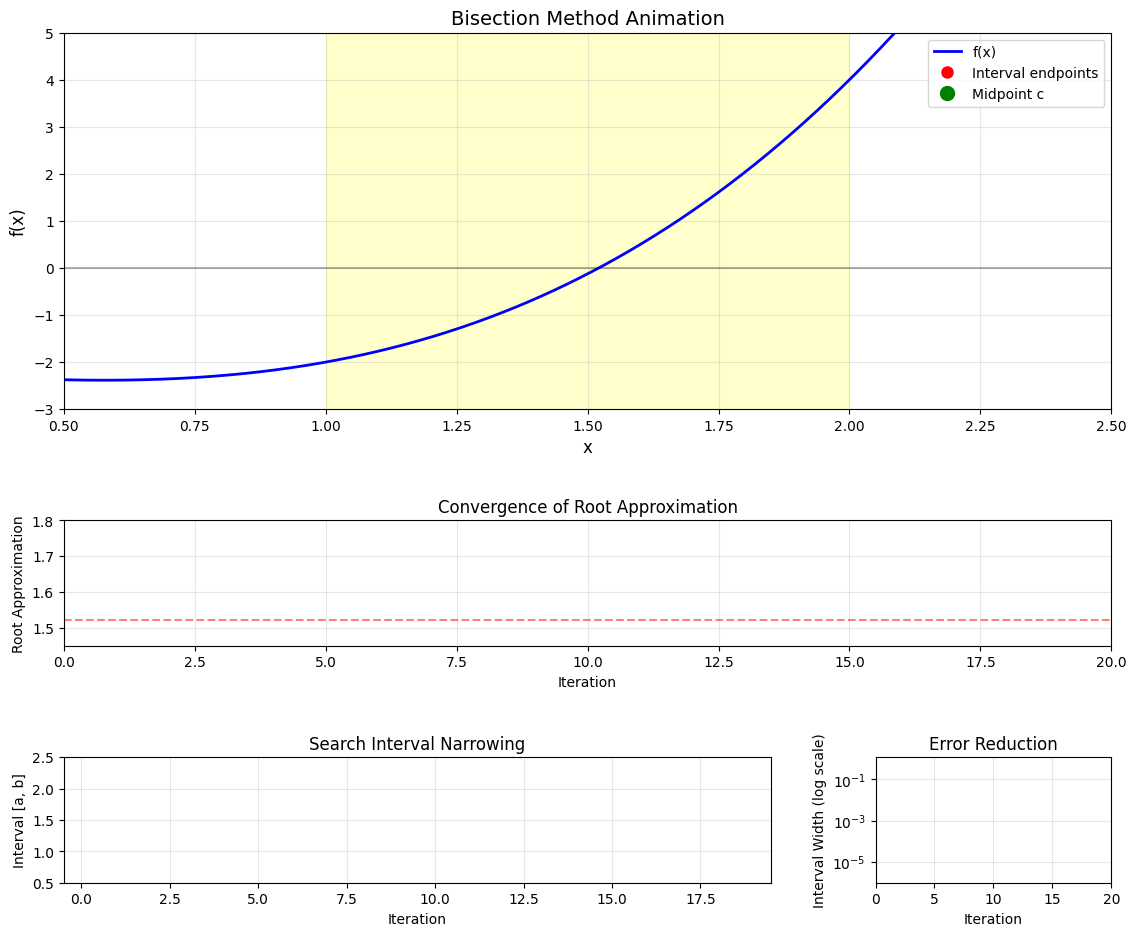

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec

def bisection(f, a, b, tol=1e-6, max_iter=100):
    """
    Find root of f(x) = 0 using bisection method.

    Parameters:
    -----------
    f : function
        The function for which we want to find the root
    a, b : float
        The interval [a, b] where f(a) and f(b) have opposite signs
    tol : float, optional
        Tolerance for stopping criterion |b - a| < tol
    max_iter : int, optional
        Maximum number of iterations

    Returns:
    --------
    x : float
        Approximate root of f(x) = 0
    iterations : list
        List of tuples (a, c, b, f(c)) for each iteration
    """
    # Check if f(a) and f(b) have opposite signs
    if f(a) * f(b) >= 0:
        raise ValueError("Function values at interval endpoints must have opposite signs")

    iterations = []

    for i in range(max_iter):
        # Compute midpoint
        c = (a + b) / 2

        # Compute function value at midpoint
        fc = f(c)

        # Store current iteration information
        iterations.append((a, c, b, fc))

        # Check if we've found the root or reached tolerance
        if abs(fc) < tol or (b - a) / 2 < tol:
            break

        # Update interval
        if f(a) * fc < 0:
            b = c
        else:
            a = c

    return c, iterations

def create_enhanced_animation(f, a, b, iterations, f_range=None, save_gif=False, filename='bisection_enhanced.gif'):
    """
    Create an enhanced animation of the bisection method with multiple visualizations.

    Parameters:
    -----------
    f : function
        The function for which we found the root
    a, b : float
        The original interval [a, b]
    iterations : list
        List of tuples (a, c, b, f(c)) for each iteration
    f_range : tuple, optional
        Range of function values to display on y-axis
    save_gif : bool, optional
        Whether to save the animation as a GIF
    filename : str, optional
        Filename for the saved GIF
    """
    # Get the original x range with some margin
    margin = (b - a) * 0.5
    x_min, x_max = a - margin, b + margin
    x = np.linspace(x_min, x_max, 1000)
    y = [f(val) for val in x]

    # Find suitable y range if not provided
    if f_range is None:
        y_min, y_max = min(y), max(y)
        y_margin = (y_max - y_min) * 0.1
        f_range = (y_min - y_margin, y_max + y_margin)

    # Create a figure with gridspec for layout control
    fig = plt.figure(figsize=(12, 10))
    gs = gridspec.GridSpec(3, 2, height_ratios=[3, 1, 1], width_ratios=[3, 1])

    # Main plot for the function
    ax1 = plt.subplot(gs[0, :])
    # Convergence plot
    ax2 = plt.subplot(gs[1, :])
    # Interval visualization
    ax3 = plt.subplot(gs[2, 0])
    # Error visualization
    ax4 = plt.subplot(gs[2, 1])

    # Plot the function on the main plot
    line, = ax1.plot(x, y, 'b-', lw=2, label='f(x)')
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(f_range)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('f(x)', fontsize=12)
    ax1.set_title('Bisection Method Animation', fontsize=14)
    ax1.grid(True, alpha=0.3)

    # Initialize plots for current interval and midpoint
    interval_plot, = ax1.plot([], [], 'ro', ms=8, label='Interval endpoints')
    midpoint_plot, = ax1.plot([], [], 'go', ms=10, label='Midpoint c')

    # Initialize the interval highlight (shaded region)
    interval_highlight = ax1.axvspan(a, b, alpha=0.2, color='yellow')

    # Create text for iteration info
    text = ax1.text(0.02, 0.98, '', transform=ax1.transAxes, fontsize=10,
                   verticalalignment='top', horizontalalignment='left',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

    ax1.legend(loc='best')

    # Setup the convergence plot (shows how midpoint converges to root)
    ax2.set_xlim(0, len(iterations))
    y_vals = [tup[1] for tup in iterations]  # Get all midpoints
    ax2.set_ylim(min(y_vals) - 0.05, max(y_vals) + 0.05)
    ax2.set_xlabel('Iteration', fontsize=10)
    ax2.set_ylabel('Root Approximation', fontsize=10)
    ax2.set_title('Convergence of Root Approximation', fontsize=12)
    ax2.grid(True, alpha=0.3)

    convergence_plot, = ax2.plot([], [], 'bo-', lw=1.5)
    convergence_point, = ax2.plot([], [], 'ro', ms=6)

    # Setup the interval visualization (shows interval narrowing)
    ax3.set_xlim(-0.5, len(iterations) - 0.5)
    ax3.set_ylim(x_min, x_max)
    ax3.set_xlabel('Iteration', fontsize=10)
    ax3.set_ylabel('Interval [a, b]', fontsize=10)
    ax3.set_title('Search Interval Narrowing', fontsize=12)
    ax3.grid(True, alpha=0.3)

    # Initialize interval bars
    interval_bars = []

    # Setup the error plot (shows error decreasing)
    ax4.set_xlim(0, len(iterations))
    errors = [(tup[2] - tup[0]) for tup in iterations]  # interval widths
    ax4.set_ylim(min(errors) / 2, max(errors) * 1.2)
    ax4.set_yscale('log')
    ax4.set_xlabel('Iteration', fontsize=10)
    ax4.set_ylabel('Interval Width (log scale)', fontsize=10)
    ax4.set_title('Error Reduction', fontsize=12)
    ax4.grid(True, alpha=0.3)

    error_plot, = ax4.plot([], [], 'ro-', lw=1.5)
    error_point, = ax4.plot([], [], 'bo', ms=6)

    # Add a horizontal line for the true root in convergence plot
    true_root = iterations[-1][1]  # Use the final approximation as the "true" root
    ax2.axhline(y=true_root, color='r', linestyle='--', alpha=0.5, label='True Root')

    fig.tight_layout(pad=3.0)

    def init():
        interval_plot.set_data([], [])
        midpoint_plot.set_data([], [])
        convergence_plot.set_data([], [])
        convergence_point.set_data([], [])
        error_plot.set_data([], [])
        error_point.set_data([], [])

        # Clear any existing interval bars
        for bar in interval_bars:
            if bar in ax3.collections:
                bar.remove()
        interval_bars.clear()

        text.set_text('')

        # Reset the interval highlight
        interval_highlight.set_xy([[a, 0], [a, 1], [b, 1], [b, 0], [a, 0]])

        return interval_plot, midpoint_plot, text, convergence_plot, convergence_point, error_plot, error_point

    def animate(i):
        a_i, c_i, b_i, fc_i = iterations[i]

        # Update main plot elements
        interval_plot.set_data([a_i, b_i], [f(a_i), f(b_i)])
        midpoint_plot.set_data([c_i], [fc_i])

        # Update the interval highlight
        interval_highlight.set_xy([[a_i, f_range[0]], [a_i, f_range[1]],
                                  [b_i, f_range[1]], [b_i, f_range[0]],
                                  [a_i, f_range[0]]])

        # Update text information
        text.set_text(f'Iteration {i+1}/{len(iterations)}\n'
                     f'a = {a_i:.6f}, f(a) = {f(a_i):.6f}\n'
                     f'c = {c_i:.6f}, f(c) = {fc_i:.6f}\n'
                     f'b = {b_i:.6f}, f(b) = {f(b_i):.6f}\n'
                     f'Interval width: {b_i - a_i:.6f}')

        # Update convergence plot
        x_conv = list(range(i+1))
        y_conv = [iterations[j][1] for j in range(i+1)]  # midpoints
        convergence_plot.set_data(x_conv, y_conv)
        convergence_point.set_data([i], [c_i])

        # Update error plot
        x_err = list(range(i+1))
        y_err = [(iterations[j][2] - iterations[j][0]) for j in range(i+1)]  # interval widths
        error_plot.set_data(x_err, y_err)
        error_point.set_data([i], [b_i - a_i])

        # Update interval visualization
        # Clear previous bars if any
        for bar in interval_bars:
            if bar in ax3.collections:
                bar.remove()
        interval_bars.clear()

        # Add bars for all iterations up to current
        for j in range(i+1):
            a_j, _, b_j, _ = iterations[j]
            bar = ax3.add_patch(Rectangle((j-0.4, a_j), 0.8, b_j-a_j,
                                        alpha=0.7, color='skyblue' if j<i else 'orange'))
            interval_bars.append(bar)

        return interval_plot, midpoint_plot, text, convergence_plot, convergence_point, error_plot, error_point, *interval_bars

    # Create animation
    ani = FuncAnimation(fig, animate, frames=len(iterations), init_func=init,
                        blit=True, repeat=True, interval=1000)

    # Save as GIF if requested
    if save_gif:
        print(f"Saving animation to {filename}...")
        ani.save(filename, writer='pillow', fps=1, dpi=100)

    return ani, fig

# Main execution block
if __name__ == "__main__":
    # Define a function with a known root
    def f(x):
        return x**3 - x - 2  # Root at approximately x ≈ 1.521

    # Initial interval
    a, b = 1, 2

    # Run bisection method
    print("Running bisection algorithm...")
    root, iterations = bisection(f, a, b, tol=1e-6)

    print(f"Approximate root: {root:.10f}")
    print(f"Function value at root: {f(root):.10f}")
    print(f"Number of iterations: {len(iterations)}")

    # Create enhanced animation with multiple visualizations
    print("Creating enhanced animation...")
    ani, fig = create_enhanced_animation(
        f, a, b, iterations,
        f_range=(-3, 5),
        save_gif=True,
        filename='bisection_enhanced.gif'
    )

    print("Animation complete. Check 'bisection_enhanced.gif' for the saved animation.")

    # Display iteration details
    print("\nFirst 5 iteration details:")
    for i, (a_i, c_i, b_i, fc_i) in enumerate(iterations[:5]):
        print(f"Iteration {i+1}:")
        print(f"  a = {a_i:.6f}, f(a) = {f(a_i):.6f}")
        print(f"  c = {c_i:.6f}, f(c) = {fc_i:.6f}")
        print(f"  b = {b_i:.6f}, f(b) = {f(b_i):.6f}")
        print(f"  Current interval width: {b_i - a_i:.6f}")

    plt.show()

# You can also try the algorithm with different functions:
# Example 1: A function with multiple roots
def multi_root_example():
    def f(x):
        return np.sin(x)  # Roots at 0, π, 2π, etc.

    a, b = 2.5, 4.0  # Should find root at π ≈ 3.14159
    root, iterations = bisection(f, a, b, tol=1e-8)

    print(f"\nSine function example:")
    print(f"Root found: {root:.8f} (should be close to π ≈ 3.14159)")
    print(f"Function value at root: {f(root):.10f}")
    print(f"Number of iterations: {len(iterations)}")

    ani, fig = create_enhanced_animation(
        f, a, b, iterations,
        save_gif=True,
        filename='bisection_sine.gif'
    )
    plt.show()

# Example 2: A function with a challenging root
def challenging_example():
    def f(x):
        return x**5 - 3*x**4 + 2*x**3 - 2*x**2 + 3*x - 1

    a, b = 0.0, 1.0
    root, iterations = bisection(f, a, b, tol=1e-8)

    print(f"\nChallenging polynomial example:")
    print(f"Root found: {root:.8f}")
    print(f"Function value at root: {f(root):.10f}")
    print(f"Number of iterations: {len(iterations)}")

    ani, fig = create_enhanced_animation(
        f, a, b, iterations,
        save_gif=True,
        filename='bisection_challenging.gif'
    )
    plt.show()

# Uncomment these lines to run additional examples:
# multi_root_example()
# challenging_example()

In [8]:
def visualize_bisection(f, a, b, iterations, f_range=None, save_gif=False, filename='bisection.gif'):
    """
    Create an animation of the bisection method.

    Parameters:
    -----------
    f : function
        The function for which we found the root
    a, b : float
        The original interval [a, b]
    iterations : list
        List of tuples (a, c, b, f(c)) for each iteration
    f_range : tuple, optional
        Range of function values to display on y-axis
    save_gif : bool, optional
        Whether to save the animation as a GIF
    filename : str, optional
        Filename for the saved GIF
    """
    # Create a range of x values for plotting
    margin = (b - a) * 0.5
    x = np.linspace(a - margin, b + margin, 1000)
    y = np.array([f(val) for val in x])

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the function
    ax.plot(x, y, 'b-', lw=2, label='f(x)')

    # Plot x-axis
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)

    # Set y-axis limits if provided
    if f_range:
        ax.set_ylim(f_range)

    # Set labels and title
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.set_title('Bisection Method Animation', fontsize=14)
    ax.grid(True, alpha=0.3)

    # Initialize plots for current interval and midpoint
    interval_plot, = ax.plot([], [], 'ro', ms=10, label='Interval endpoints')
    midpoint_plot, = ax.plot([], [], 'go', ms=10, label='Midpoint')

    text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax.legend(loc='best')

    def init():
        interval_plot.set_data([], [])
        midpoint_plot.set_data([], [])
        text.set_text('')
        return interval_plot, midpoint_plot, text

    def animate(i):
        a_i, c_i, b_i, fc_i = iterations[i]

        # Ensure correct array shapes
        interval_plot.set_data([a_i, b_i], [f(a_i), f(b_i)])  # Fix: Ensure correct array shape
        midpoint_plot.set_data([c_i], [fc_i])  # Fix: Midpoint only has one value

        # Update text information
        text.set_text(f'Iteration {i+1}\n'
                      f'a = {a_i:.6f}, f(a) = {f(a_i):.6f}\n'
                      f'c = {c_i:.6f}, f(c) = {fc_i:.6f}\n'
                      f'b = {b_i:.6f}, f(b) = {f(b_i):.6f}\n'
                      f'Current interval width: {b_i - a_i:.6f}')

        return interval_plot, midpoint_plot, text

    # Create animation
    ani = FuncAnimation(fig, animate, frames=len(iterations), init_func=init,
                        blit=False, repeat=True, interval=1000)  # Fix: `blit=False` to avoid rendering issues

    # Save as GIF if requested
    if save_gif:
        ani.save(filename, writer='pillow', fps=1)

    plt.tight_layout()
    plt.show()

    return ani


Running bisection algorithm...
Approximate root: 1.5213804245
Function value at root: 0.0000042658
Number of iterations: 20
Creating visualization...


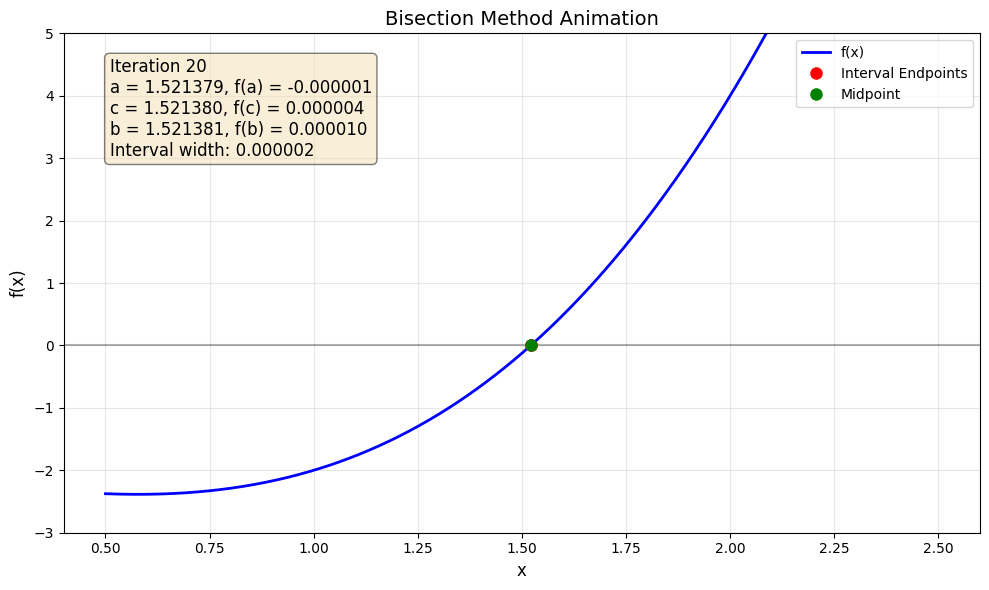

Visualization complete. Check 'bisection_animation.gif' for the saved animation.

Iteration details:
Iteration 1:
  a = 1.000000, f(a) = -2.000000
  c = 1.500000, f(c) = -0.125000
  b = 2.000000, f(b) = 4.000000
  Interval width: 1.000000
Iteration 2:
  a = 1.500000, f(a) = -0.125000
  c = 1.750000, f(c) = 1.609375
  b = 2.000000, f(b) = 4.000000
  Interval width: 0.500000
Iteration 3:
  a = 1.500000, f(a) = -0.125000
  c = 1.625000, f(c) = 0.666016
  b = 1.750000, f(b) = 1.609375
  Interval width: 0.250000
Iteration 4:
  a = 1.500000, f(a) = -0.125000
  c = 1.562500, f(c) = 0.252197
  b = 1.625000, f(b) = 0.666016
  Interval width: 0.125000
Iteration 5:
  a = 1.500000, f(a) = -0.125000
  c = 1.531250, f(c) = 0.059113
  b = 1.562500, f(b) = 0.252197
  Interval width: 0.062500


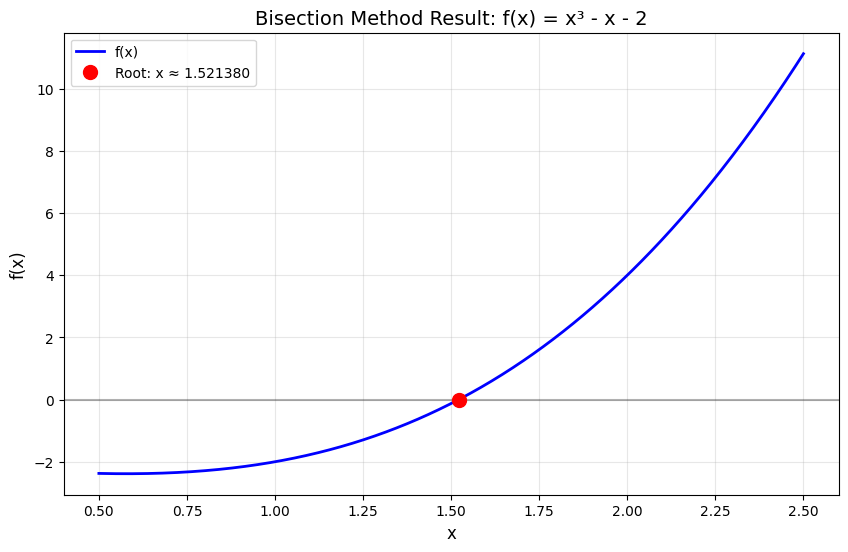

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def bisection(f, a, b, tol=1e-6, max_iter=100):
    """
    Find root of f(x) = 0 using the bisection method.
    """
    if f(a) * f(b) >= 0:
        raise ValueError("Function values at interval endpoints must have opposite signs")

    iterations = []

    for i in range(max_iter):
        c = (a + b) / 2  # Midpoint
        fc = f(c)

        iterations.append((a, c, b, fc))  # Store iteration values

        if abs(fc) < tol or (b - a) / 2 < tol:
            break

        if f(a) * fc < 0:
            b = c
        else:
            a = c

    return c, iterations

def visualize_bisection(f, a, b, iterations, f_range=None, save_gif=False, filename='bisection.gif'):
    """
    Creates an animated visualization of the bisection method.
    """
    # Define x values for plotting the function
    margin = (b - a) * 0.5
    x = np.linspace(a - margin, b + margin, 1000)
    y = [f(val) for val in x]

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, 'b-', lw=2, label='f(x)')

    # Plot x-axis
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)

    if f_range:
        ax.set_ylim(f_range)

    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.set_title('Bisection Method Animation', fontsize=14)
    ax.grid(True, alpha=0.3)

    # Initialize interval and midpoint markers
    interval_plot, = ax.plot([], [], 'ro', markersize=8, label='Interval Endpoints')
    midpoint_plot, = ax.plot([], [], 'go', markersize=8, label='Midpoint')
    text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax.legend(loc='best')

    def init():
        """Initialize empty plots for animation."""
        interval_plot.set_data([], [])
        midpoint_plot.set_data([], [])
        text.set_text('')
        return interval_plot, midpoint_plot, text

    def animate(i):
        """Update animation at each iteration."""
        a_i, c_i, b_i, fc_i = iterations[i]

        # Update interval endpoints
        interval_plot.set_data([a_i, b_i], [f(a_i), f(b_i)])

        # Update midpoint
        midpoint_plot.set_data([c_i], [fc_i])

        # Update iteration details
        text.set_text(f'Iteration {i+1}\n'
                      f'a = {a_i:.6f}, f(a) = {f(a_i):.6f}\n'
                      f'c = {c_i:.6f}, f(c) = {fc_i:.6f}\n'
                      f'b = {b_i:.6f}, f(b) = {f(b_i):.6f}\n'
                      f'Interval width: {b_i - a_i:.6f}')

        return interval_plot, midpoint_plot, text

    ani = FuncAnimation(fig, animate, frames=len(iterations), init_func=init,
                        blit=False, repeat=True, interval=1000)

    # Save as GIF if requested
    if save_gif:
        ani.save(filename, writer='pillow', fps=1)

    plt.tight_layout()
    plt.show()

    return ani

def plot_final_result(f, a, b, root):
    """
    Plot the function and the found root.
    """
    margin = (b - a) * 0.5
    x = np.linspace(a - margin, b + margin, 1000)
    y = [f(val) for val in x]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', lw=2, label='f(x)')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.plot([root], [f(root)], 'ro', markersize=10, label=f'Root: x ≈ {root:.6f}')

    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.title(f'Bisection Method Result: f(x) = x³ - x - 2', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')

    plt.savefig('bisection_final_result.png')
    plt.show()

# Main execution block
if __name__ == "__main__":
    # Define function
    def f(x):
        return x**3 - x - 2  # Root at approximately x ≈ 1.521

    # Initial interval
    a, b = 1, 2

    # Run bisection method
    print("Running bisection algorithm...")
    root, iterations = bisection(f, a, b, tol=1e-6)

    print(f"Approximate root: {root:.10f}")
    print(f"Function value at root: {f(root):.10f}")
    print(f"Number of iterations: {len(iterations)}")

    # Create animation
    print("Creating visualization...")
    ani = visualize_bisection(f, a, b, iterations, f_range=(-3, 5), save_gif=True, filename='bisection_animation.gif')

    print("Visualization complete. Check 'bisection_animation.gif' for the saved animation.")

    # Display iteration details
    print("\nIteration details:")
    for i, (a_i, c_i, b_i, fc_i) in enumerate(iterations[:5]):
        print(f"Iteration {i+1}:")
        print(f"  a = {a_i:.6f}, f(a) = {f(a_i):.6f}")
        print(f"  c = {c_i:.6f}, f(c) = {fc_i:.6f}")
        print(f"  b = {b_i:.6f}, f(b) = {f(b_i):.6f}")
        print(f"  Interval width: {b_i - a_i:.6f}")

    # Plot final result
    plot_final_result(f, a, b, root)
